In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Import the CSV Data as Pandas DataFrame**

In [6]:
df = pd.read_csv('stud.csv')

**Show Top 5 Records**

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset** 

In [8]:
df.shape

(1000, 8)

**2.2 Dataset information**
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (*standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score
**3. Data Checks to perform**
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

**3.1 Check Missing values**

In [10]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

**3.2 Check Duplicates**

In [12]:
df.duplicated().sum()

0

There are no duplicates values in the data set

**3.3 Check data types**

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


**3.4 Checking the number of unique values of each column**

In [13]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**3.5 Check statistics of data set**

In [15]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

**3.7 Exploring Data**

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
print('Categories in gender variable: ',end=" ")
print(df['gender'].unique())
print('Categories in race_ethnicity variable: ',end=" ")
print(df['race_ethnicity'].unique())
print('Categories in parental_level_of_education variable: ',end=" ")
print(df['parental_level_of_education'].unique())
print('Categories in lunch variable: ',end=" ")
print(df['lunch'].unique())
print('Categories in test_preparation_course variable: ',end=" ")
print(df['test_preparation_course'].unique())


Categories in gender variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:  ['standard' 'free/reduced']
Categories in test_preparation_course variable:  ['none' 'completed']


In [62]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [cat for cat in df.columns if df[cat].dtype == 'O']

print('There are total of {}  numberical features in the dataset, they are: {} '.format(len(numeric_features),numeric_features))       
print('There are total of {}  numberical features in the dataset, they are: {} '.format(len(cat_features),cat_features))

There are total of 3  numberical features in the dataset, they are: ['math_score', 'reading_score', 'writing_score'] 
There are total of 5  numberical features in the dataset, they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [64]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


**3.8 Adding columns for "Total Score" and "Average"**

In [70]:
df["total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [83]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df["writing_score"] == 100]['average_score'].count()
math_full = df[df["math_score"] == 100]["average_score"].count()

print('number of students with full score in reading: ',reading_full)
print('number of students with full score in writing: ',writing_full)
print('number of students with full score in math: ',math_full)

number of students with full score in reading:  17
number of students with full score in writing:  14
number of students with full score in math:  7


In [90]:
reading_less_20 = df[df['reading_score']<= 20]["average_score"].count()
writing_less_20 = df[df["writing_score"]<=20]["average_score"].count()
math_less_20 = df[df["math_score"]<=20]["average_score"].count()
print('number of students with score less then 20 in reading: ',reading_less_20)
print('nember of students with score less then 20 in writing: ',writing_less_20)
print('nember of students with score less then 20 in math: ',math_less_20)

number of students with score less then 20 in reading:  1
nember of students with score less then 20 in writing:  3
nember of students with score less then 20 in math:  4


INSIGHTS:
    
    1.From above values we get students have performed the worst in Maths when compared to reading and english.
    2.Reading section has the best performance.

4. Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion.

Histogram

Kernel Distribution Function (KDE)

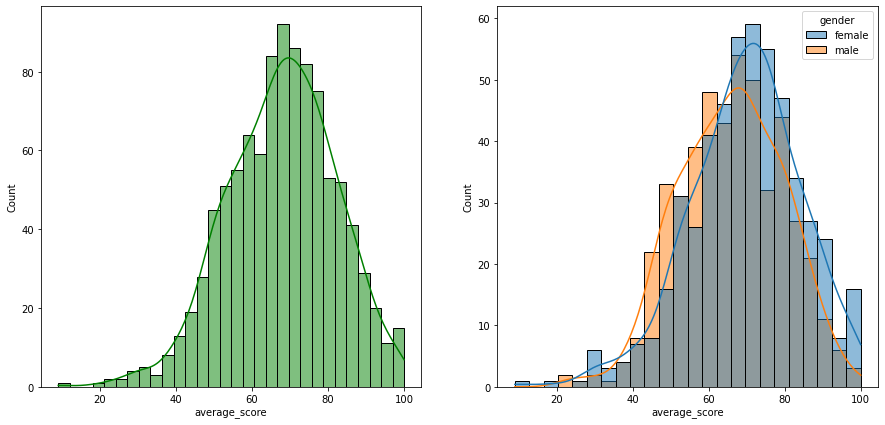

In [98]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average_score",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x="average_score",kde=True,hue="gender")
plt.show()

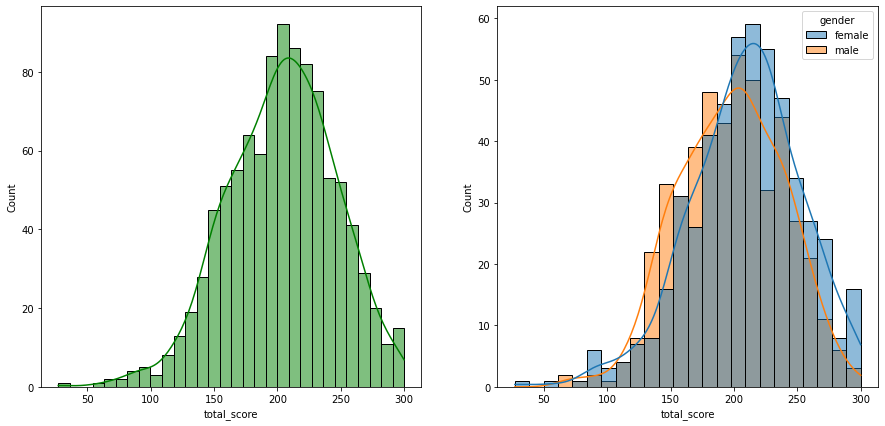

In [102]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

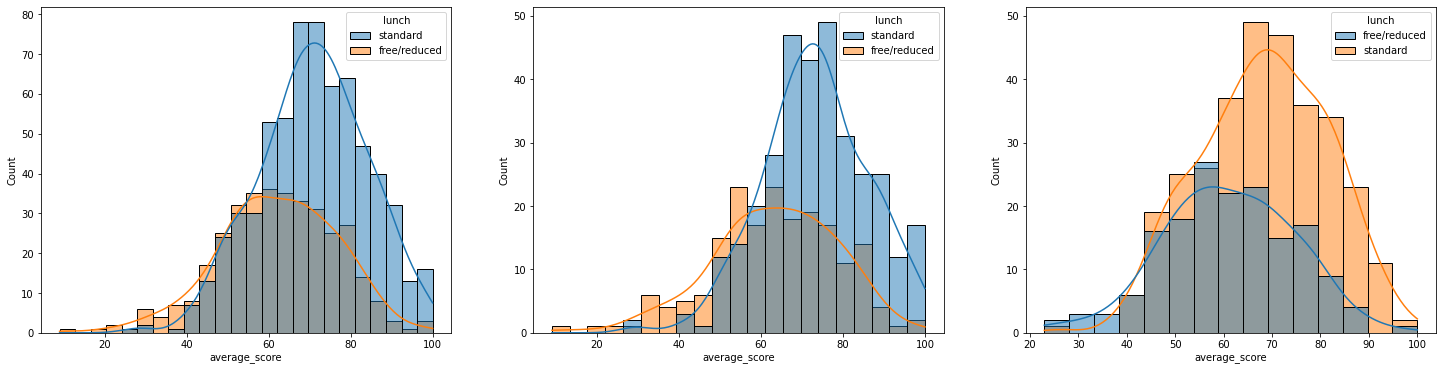

In [109]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=='female'],x="average_score",kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insights.

1.Students who take standard lunch tend to perform well in exams.

2.This holds true for both female and male students.

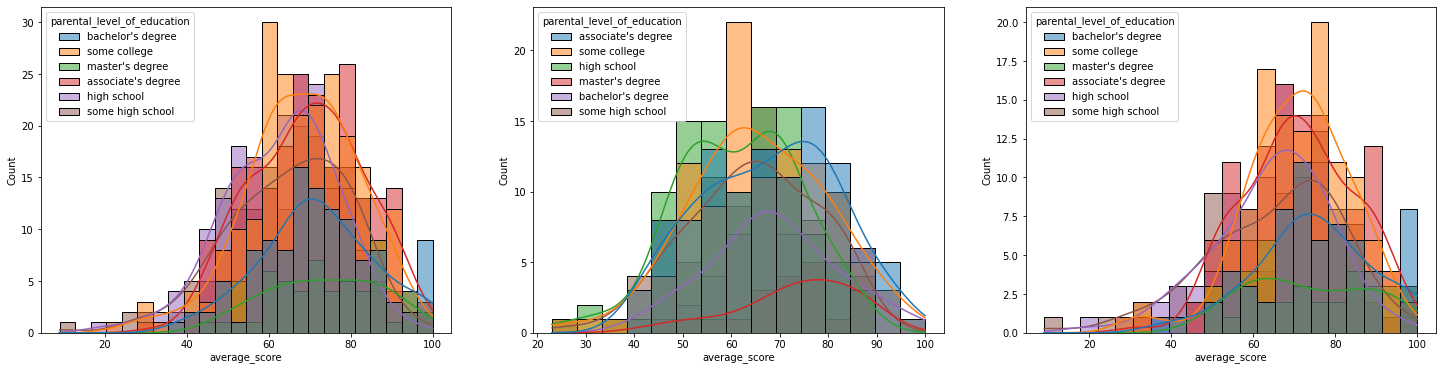

In [113]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df["gender"]=='male'],x="average_score",kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df["gender"]=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

Insights:

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

3rd plot we can see there is no effect of parent's education on female students.

**4.2 Maximumum score of students in all three subjects**

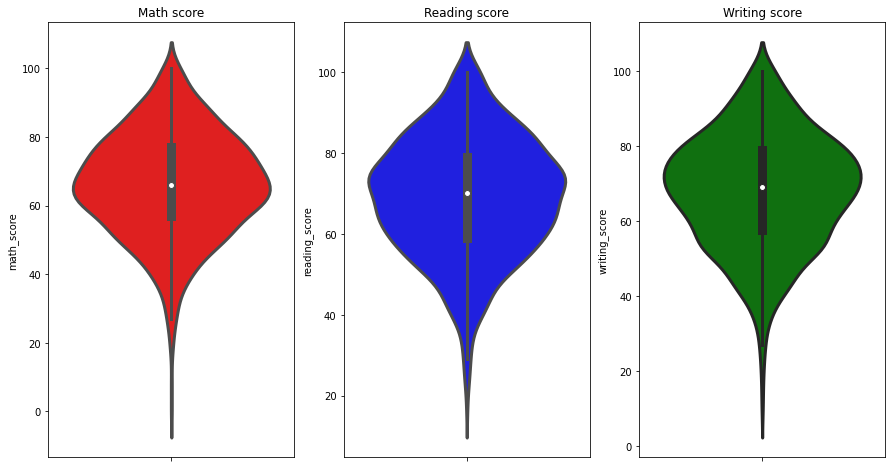

In [122]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
plt.title('Math score')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('Reading score')
sns.violinplot(data=df,y='reading_score',color='blue',linewidth=3)
plt.subplot(1,3,3)
plt.title('Writing score')
sns.violinplot(data=df,y='writing_score',color='green',linewidth=3)
plt.show()

**Insights**

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


**4.4.2 RACE/EHNICITY COLUMN**

* How is Group wise distribution ?
* Impact of Race/Ehnicity on student's performance ?

**UNIVARIATE ANALYSIS ( How is Group wise distribution ?)**

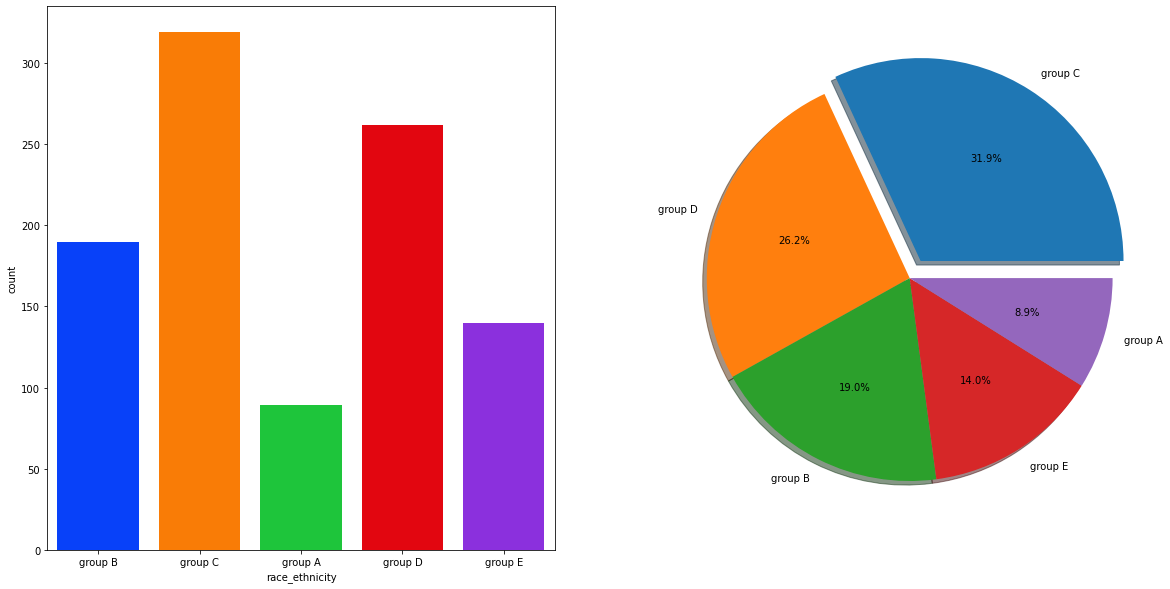

In [138]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)    
plt.pie(x=df["race_ethnicity"].value_counts(),labels=df["race_ethnicity"].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

**Insights**
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

**BIVARIATE ANALYSIS** ( Is Race/Ehnicity has any impact on student's performance ? )

Text(0.5, 1.0, 'Writing score')

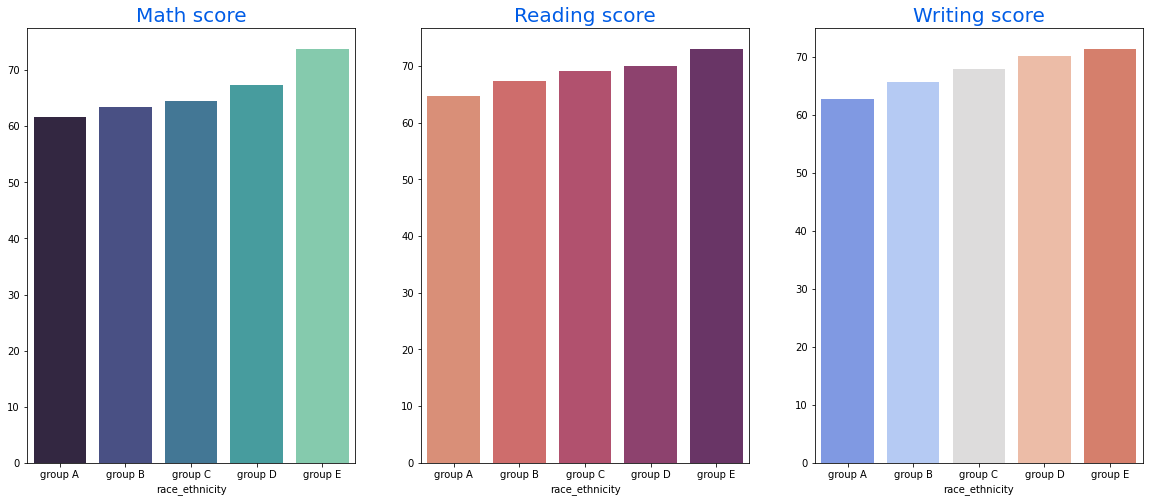

In [164]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)


sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

sns.barplot(x=Group_data2["writing_score"].mean().index,y=Group_data2["writing_score"].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

**Insights**
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.


**4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN**

* What is educational background of student's parent ?
* Is parental education has any impact on student's performance ?

**UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )**

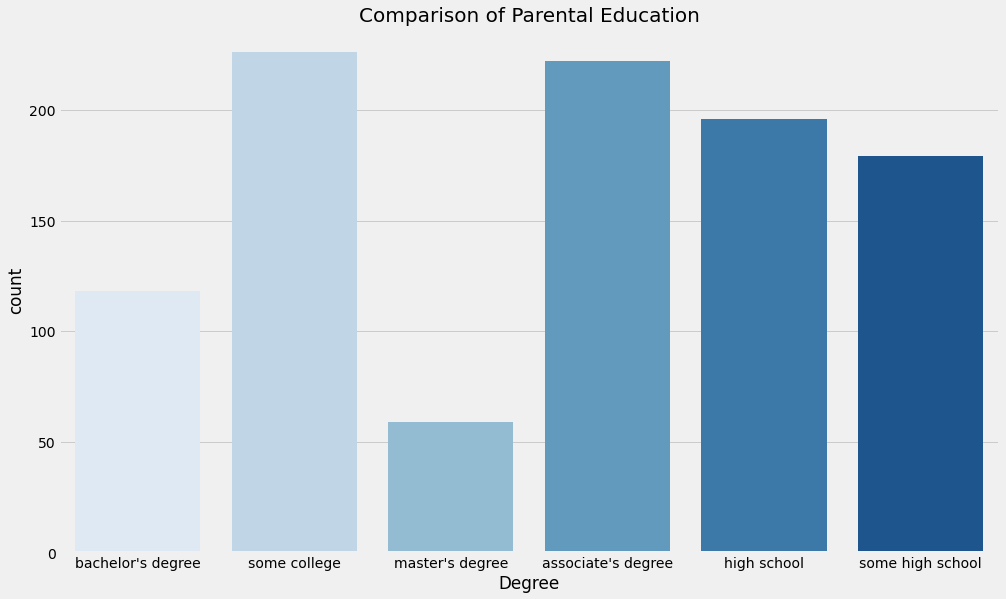

In [170]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df["parental_level_of_education"],palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [169]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average_score'],
      dtype='object')

**Insights**
* Largest number of parents have attended 'some college'.




**BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )**

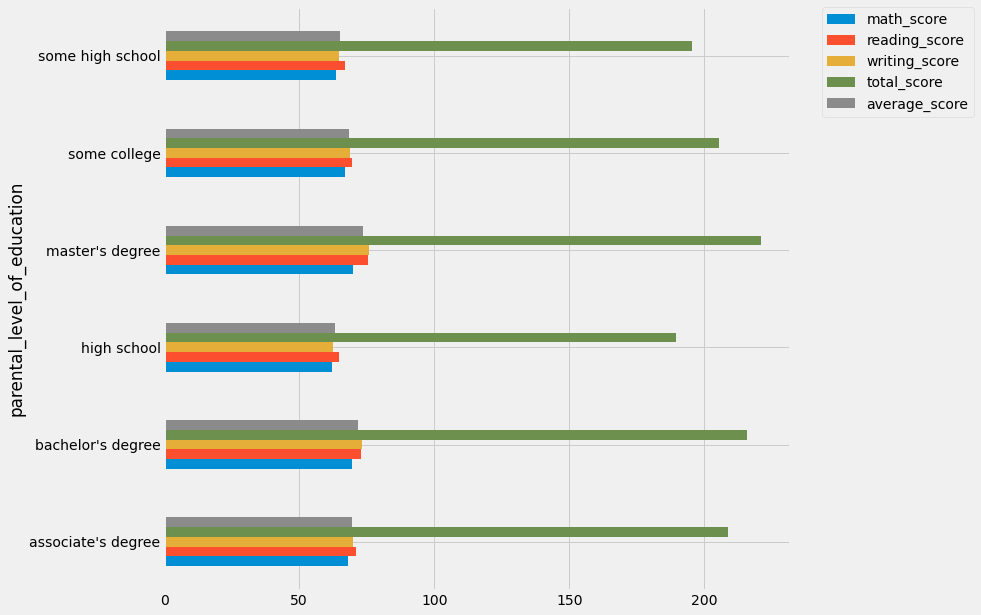

In [176]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**INSIGHTS**

* Students whoes children have completed masters degree tend to perform better than other students.

**4.4.4 LUNCH COLUMN**

*Which type of lunch is most common amoung students ?

*What is the effect of lunch type on test results?

**UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )**/


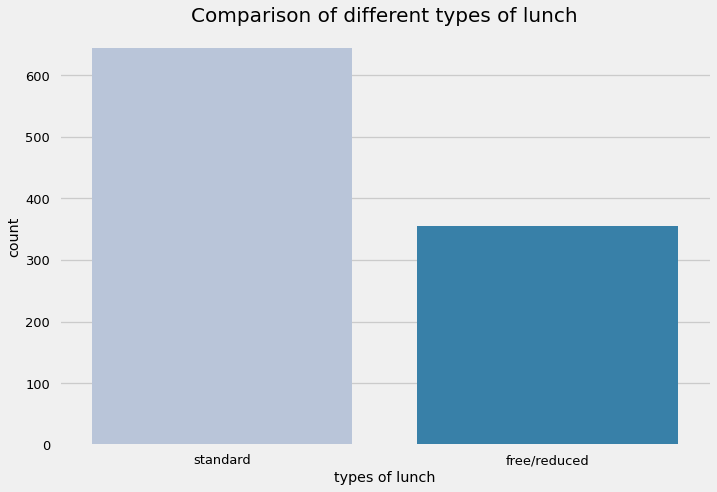

In [179]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'],palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

**Insights**

* Students being served Standard lunch was more than free lunch

**BIVARIATE ANALYSIS** ( Is lunch type intake has any impact on student's performance ? )

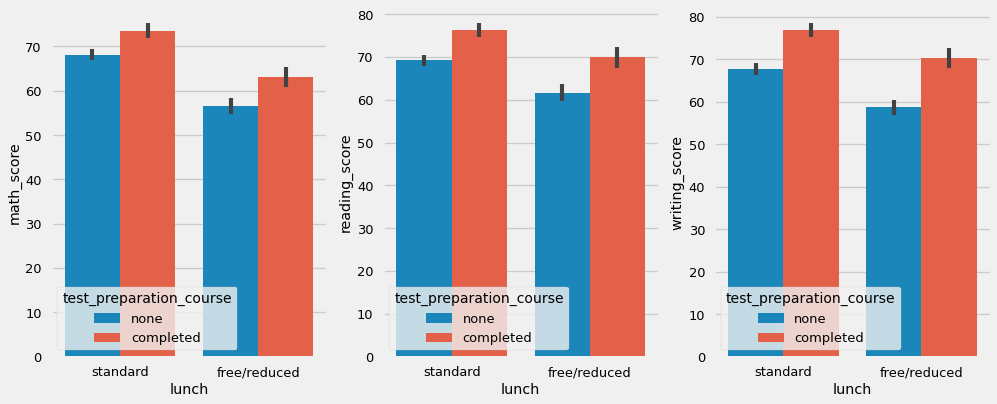

In [182]:
plt.figure(figsize=(15,6))
plt.subplot(131)
sns.barplot(x=df['lunch'],y=df['math_score'],hue=df['test_preparation_course'])
plt.subplot(132)
sns.barplot(x=df["lunch"],y=df["reading_score"],hue=df['test_preparation_course'])
plt.subplot(133)
sns.barplot(x=df['lunch'],y=df["writing_score"],hue=df["test_preparation_course"])
plt.show()

**Insights**
* Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

**4.4.6 CHECKING OUTLIERS**

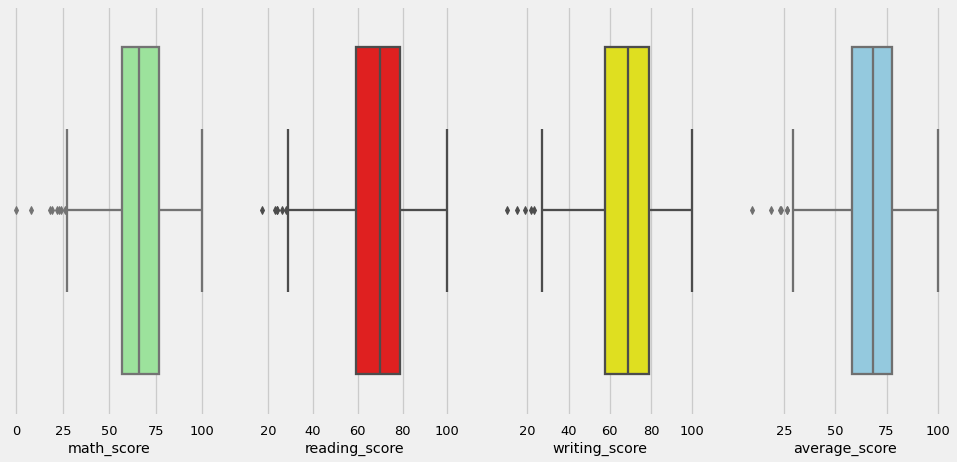

In [199]:
plt.subplots(1,4,figsize=(15,7))
plt.subplot(141)
sns.boxplot(df["math_score"],color="lightgreen")
plt.subplot(142)
sns.boxplot(df["reading_score"],color='red')
plt.subplot(143)
sns.boxplot(df["writing_score"],color='yellow')
plt.subplot(144)
sns.boxplot(df["average_score"],color='skyblue')
plt.show()

**4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT**

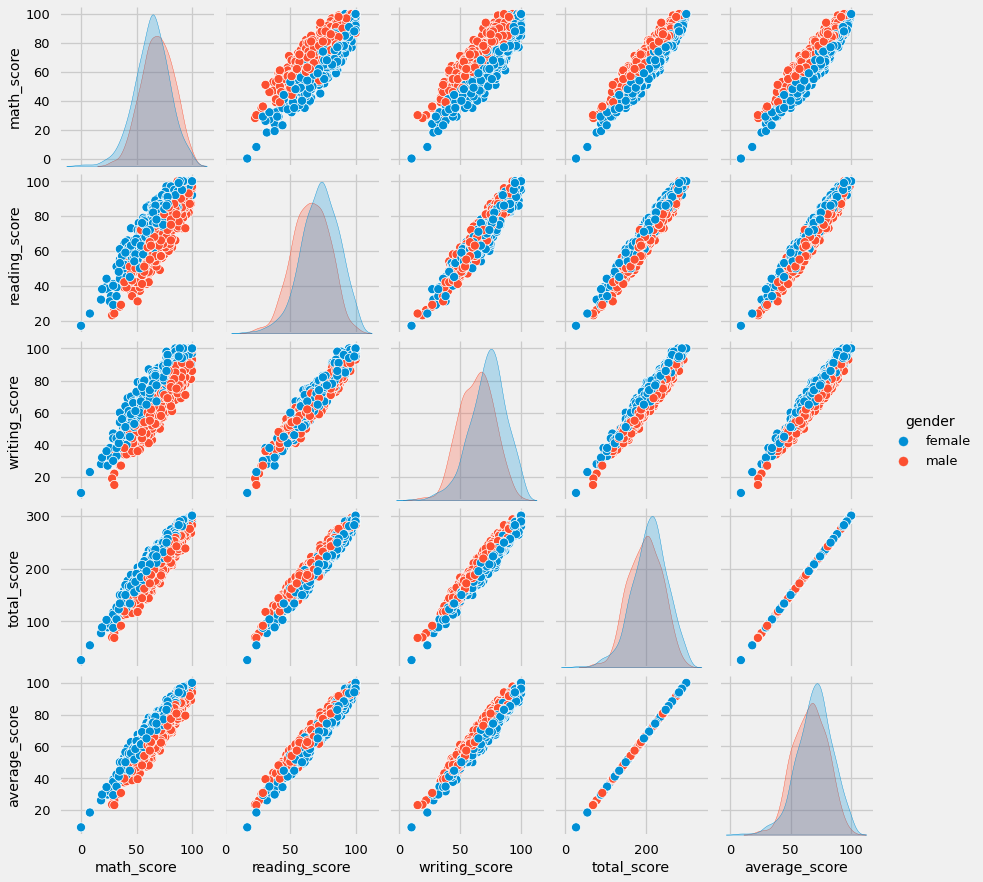

In [201]:
sns.pairplot(df,hue='gender')
plt.show()

**Insights**
* From the abo*ve plot it is clear that all the scores increase linearly with each other.


**5. Conclusions**
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.